In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import kruskal
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, average_precision_score, f1_score,
                             precision_score, recall_score)
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

sns.set_theme(style = 'whitegrid', context='paper', palette='Greys', font_scale=1.5)

# Effectiveness Analysis

In [5]:
mlp_sp = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(50,), learning_rate='constant', learning_rate_init=0.01, max_iter=200)
rf_sp = RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=1, min_samples_split=10, n_estimators=500)
xgb_sp = XGBClassifier(colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=6, subsample=0.6)

In [6]:
data = pd.read_csv('../data/bias_symptoms.csv', index_col=[0,1])
data.index = data.index.droplevel(0)
labels = ['statistical_parity', 'equal_opportunity', 'average_odds']

In [7]:
# Average Precision

sp_mlp_train_ap = []
sp_rf_train_ap = []
sp_xgb_train_ap = []
sp_mlp_test_ap = []
sp_rf_test_ap = []
sp_xgb_test_ap = []

eo_mlp_train_ap = []
eo_rf_train_ap = []
eo_xgb_train_ap = []
eo_mlp_test_ap = []
eo_rf_test_ap = []
eo_xgb_test_ap = []

ao_mlp_train_ap = []
ao_rf_train_ap = []
ao_xgb_train_ap = []
ao_mlp_test_ap = []
ao_rf_test_ap = []
ao_xgb_test_ap = []

# Precision

sp_mlp_train_prec = []
sp_rf_train_prec = []
sp_xgb_train_prec = []
sp_mlp_test_prec = []
sp_rf_test_prec = []
sp_xgb_test_prec = []

eo_mlp_train_prec = []
eo_rf_train_prec = []
eo_xgb_train_prec = []
eo_mlp_test_prec = []
eo_rf_test_prec = []
eo_xgb_test_prec = []

ao_mlp_train_prec = []
ao_rf_train_prec = []
ao_xgb_train_prec = []
ao_mlp_test_prec = []
ao_rf_test_prec = []
ao_xgb_test_prec = []

# Recall

sp_mlp_train_rec = []
sp_rf_train_rec = []
sp_xgb_train_rec = []
sp_mlp_test_rec = []
sp_rf_test_rec = []
sp_xgb_test_rec = []

eo_mlp_train_rec = []
eo_rf_train_rec = []
eo_xgb_train_rec = []
eo_mlp_test_rec = []
eo_rf_test_rec = []
eo_xgb_test_rec = []

ao_mlp_train_rec = []
ao_rf_train_rec = []
ao_xgb_train_rec = []
ao_mlp_test_rec = []
ao_rf_test_rec = []
ao_xgb_test_rec = []

# F1 Score

sp_mlp_train_f1 = []
sp_rf_train_f1 = []
sp_xgb_train_f1 = []
sp_mlp_test_f1 = []
sp_rf_test_f1 = []
sp_xgb_test_f1 = []

eo_mlp_train_f1 = []
eo_rf_train_f1 = []
eo_xgb_train_f1 = []
eo_mlp_test_f1 = []
eo_rf_test_f1 = []
eo_xgb_test_f1 = []

ao_mlp_train_f1 = []
ao_rf_train_f1 = []
ao_xgb_train_f1 = []
ao_mlp_test_f1 = []
ao_rf_test_f1 = []
ao_xgb_test_f1 = []

# Accuracy

sp_mlp_train_acc = []
sp_rf_train_acc = []
sp_xgb_train_acc = []
sp_mlp_test_acc = []
sp_rf_test_acc = []
sp_xgb_test_acc = []

eo_mlp_train_acc = []
eo_rf_train_acc = []
eo_xgb_train_acc = []
eo_mlp_test_acc = []
eo_rf_test_acc = []
eo_xgb_test_acc = []

ao_mlp_train_acc = []
ao_rf_train_acc = []
ao_xgb_train_acc = []
ao_mlp_test_acc = []
ao_rf_test_acc = []
ao_xgb_test_acc = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for itrain, itest in kfold.split(data.index.unique().values):
    train_index = data.index.unique()[itrain]
    test_index = data.index.unique()[itest]
    print(train_index)
    print(test_index)
    train = data.loc[train_index]
    test = data.loc[test_index]

    print("Train size: ", train.shape[0])
    print("Test size: ", test.shape[0])

    mlp_sp.fit(train.drop(columns=labels), train[labels])
    rf_sp.fit(train.drop(columns=labels), train[labels])
    xgb_sp.fit(train.drop(columns=labels), train[labels])

    mlp_train = mlp_sp.predict_proba(train.drop(columns=labels))
    rf_train = rf_sp.predict_proba(train.drop(columns=labels))
    xgb_train = xgb_sp.predict_proba(train.drop(columns=labels))
    mlp_test = mlp_sp.predict_proba(test.drop(columns=labels))
    rf_test = rf_sp.predict_proba(test.drop(columns=labels))
    xgb_test = xgb_sp.predict_proba(test.drop(columns=labels))

    mlp_train_pred = mlp_sp.predict(train.drop(columns=labels))
    rf_train_pred = rf_sp.predict(train.drop(columns=labels))
    xgb_train_pred = xgb_sp.predict(train.drop(columns=labels))
    mlp_test_pred = mlp_sp.predict(test.drop(columns=labels))
    rf_test_pred = rf_sp.predict(test.drop(columns=labels))
    xgb_test_pred = xgb_sp.predict(test.drop(columns=labels))

    sp_mlp_train_ap.append(average_precision_score(train["statistical_parity"], mlp_train[:, 0]))
    sp_rf_train_ap.append(average_precision_score(train["statistical_parity"], rf_train[0][:, 1]))
    sp_xgb_train_ap.append(average_precision_score(train["statistical_parity"], xgb_train[:, 0]))
    sp_mlp_test_ap.append(average_precision_score(test["statistical_parity"], mlp_test[:, 0]))
    sp_rf_test_ap.append(average_precision_score(test["statistical_parity"], rf_test[0][:, 1]))
    sp_xgb_test_ap.append(average_precision_score(test["statistical_parity"], xgb_test[:, 0]))

    eo_mlp_train_ap.append(average_precision_score(train["equal_opportunity"], mlp_train[:, 1]))
    eo_rf_train_ap.append(average_precision_score(train["equal_opportunity"], rf_train[1][:, 1]))
    eo_xgb_train_ap.append(average_precision_score(train["equal_opportunity"], xgb_train[:, 1]))
    eo_mlp_test_ap.append(average_precision_score(test["equal_opportunity"], mlp_test[:, 1]))
    eo_rf_test_ap.append(average_precision_score(test["equal_opportunity"], rf_test[1][:, 1]))
    eo_xgb_test_ap.append(average_precision_score(test["equal_opportunity"], xgb_test[:, 1]))

    ao_mlp_train_ap.append(average_precision_score(train["average_odds"], mlp_train[:, 2]))
    ao_rf_train_ap.append(average_precision_score(train["average_odds"], rf_train[2][:, 1]))
    ao_xgb_train_ap.append(average_precision_score(train["average_odds"], xgb_train[:, 2]))
    ao_mlp_test_ap.append(average_precision_score(test["average_odds"], mlp_test[:, 2]))
    ao_rf_test_ap.append(average_precision_score(test["average_odds"], rf_test[2][:, 1]))
    ao_xgb_test_ap.append(average_precision_score(test["average_odds"], xgb_test[:, 2]))

    sp_mlp_train_prec.append(precision_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_prec.append(precision_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_prec.append(precision_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_prec.append(precision_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_prec.append(precision_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_prec.append(precision_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_prec.append(precision_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_prec.append(precision_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_prec.append(precision_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_prec.append(precision_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_prec.append(precision_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_prec.append(precision_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_prec.append(precision_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_prec.append(precision_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_prec.append(precision_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_prec.append(precision_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_prec.append(precision_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_prec.append(precision_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_rec.append(recall_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_rec.append(recall_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_rec.append(recall_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_rec.append(recall_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_rec.append(recall_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_rec.append(recall_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_rec.append(recall_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_rec.append(recall_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_rec.append(recall_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_rec.append(recall_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_rec.append(recall_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_rec.append(recall_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_rec.append(recall_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_rec.append(recall_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_rec.append(recall_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_rec.append(recall_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_rec.append(recall_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_rec.append(recall_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_f1.append(f1_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_f1.append(f1_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_f1.append(f1_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_f1.append(f1_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_f1.append(f1_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_f1.append(f1_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_f1.append(f1_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_f1.append(f1_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_f1.append(f1_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_f1.append(f1_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_f1.append(f1_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_f1.append(f1_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_f1.append(f1_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_f1.append(f1_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_f1.append(f1_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_f1.append(f1_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_f1.append(f1_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_f1.append(f1_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_acc.append(accuracy_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_acc.append(accuracy_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_acc.append(accuracy_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_acc.append(accuracy_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_acc.append(accuracy_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_acc.append(accuracy_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_acc.append(accuracy_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_acc.append(accuracy_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_acc.append(accuracy_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_acc.append(accuracy_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_acc.append(accuracy_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_acc.append(accuracy_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_acc.append(accuracy_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_acc.append(accuracy_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_acc.append(accuracy_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_acc.append(accuracy_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_acc.append(accuracy_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_acc.append(accuracy_score(test["average_odds"], xgb_test_pred[:, 2]))

Index(['arrhythmia', 'bank', 'cmc', 'compas', 'credit', 'crime', 'diabetic',
       'german', 'health', 'ibm', 'law', 'medical', 'obesity', 'placement',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['adult', 'drug', 'hearth', 'park', 'resyduo'], dtype='object', name='data')
Train size:  4940
Test size:  990
Index(['adult', 'bank', 'cmc', 'compas', 'crime', 'diabetic', 'drug', 'health',
       'hearth', 'ibm', 'medical', 'obesity', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['arrhythmia', 'credit', 'german', 'law', 'us'], dtype='object', name='data')
Train size:  4884
Test size:  1046
Index(['adult', 'arrhythmia', 'credit', 'crime', 'diabetic', 'drug', 'german',
       'health', 'hearth', 'law', 'medical', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['bank', 'cmc', 'compas', 'ibm', 

In [8]:
sp_data_full_xgb = pd.DataFrame({
    'ap': sp_xgb_test_ap,
    'accuracy': sp_xgb_test_acc,
    'precision': sp_xgb_test_prec,
    'recall': sp_xgb_test_rec,
    'f1': sp_xgb_test_f1,
})
sp_data_full_xgb['model'] = 'XGBoost'
sp_data_full_rf = pd.DataFrame({
    'ap': sp_rf_test_ap,
    'accuracy': sp_rf_test_acc,
    'precision': sp_rf_test_prec,
    'recall': sp_rf_test_rec,
    'f1': sp_rf_test_f1,
})
sp_data_full_rf['model'] = 'Random Forest'
sp_data_full_mlp = pd.DataFrame({
    'ap': sp_mlp_test_ap,
    'accuracy': sp_mlp_test_acc,
    'precision': sp_mlp_test_prec,
    'recall': sp_mlp_test_rec,
    'f1': sp_mlp_test_f1,
}) 
sp_data_full_mlp['model'] = 'MLP'
sp_data_full = pd.concat([sp_data_full_xgb, sp_data_full_rf, sp_data_full_mlp])

eo_data_full_xgb = pd.DataFrame({
    'ap': eo_xgb_test_ap,
    'accuracy': eo_xgb_test_acc,
    'precision': eo_xgb_test_prec,
    'recall': eo_xgb_test_rec,
    'f1': eo_xgb_test_f1,
})
eo_data_full_xgb['model'] = 'XGBoost'
eo_data_full_rf = pd.DataFrame({
    'ap': eo_rf_test_ap,
    'accuracy': eo_rf_test_acc,
    'precision': eo_rf_test_prec,
    'recall': eo_rf_test_rec,
    'f1': eo_rf_test_f1,
})
eo_data_full_rf['model'] = 'Random Forest'
eo_data_full_mlp = pd.DataFrame({
    'ap': eo_mlp_test_ap,
    'accuracy': eo_mlp_test_acc,
    'precision': eo_mlp_test_prec,
    'recall': eo_mlp_test_rec,
    'f1': eo_mlp_test_f1,
})
eo_data_full_mlp['model'] = 'MLP'
eo_data_full = pd.concat([eo_data_full_xgb, eo_data_full_rf, eo_data_full_mlp])

ao_data_full_xgb = pd.DataFrame({
    'ap': ao_xgb_test_ap,
    'accuracy': ao_xgb_test_acc,
    'precision': ao_xgb_test_prec,
    'recall': ao_xgb_test_rec,
    'f1': ao_xgb_test_f1,
})
ao_data_full_xgb['model'] = 'XGBoost'
ao_data_full_rf = pd.DataFrame({
    'ap': ao_rf_test_ap,
    'accuracy': ao_rf_test_acc,
    'precision': ao_rf_test_prec,
    'recall': ao_rf_test_rec,
    'f1': ao_rf_test_f1,
})
ao_data_full_rf['model'] = 'Random Forest'
ao_data_full_mlp = pd.DataFrame({
    'ap': ao_mlp_test_ap,
    'accuracy': ao_mlp_test_acc,
    'precision': ao_mlp_test_prec,
    'recall': ao_mlp_test_rec,
    'f1': ao_mlp_test_f1,
})
ao_data_full_mlp['model'] = 'MLP'
ao_data_full = pd.concat([ao_data_full_xgb, ao_data_full_rf, ao_data_full_mlp])

In [14]:
def group_metrics(data):
    return data.groupby('model').agg(['mean', 'std']).round(3).reset_index()

In [20]:
sp = group_metrics(sp_data_full)
eo = group_metrics(eo_data_full)
ao = group_metrics(ao_data_full)
full_data = pd.concat([sp_data_full, eo_data_full, ao_data_full])
full = group_metrics(full_data)
sp.to_csv("bias_symptoms_sp.csv")
eo.to_csv("bias_symptoms_eo.csv")
ao.to_csv("bias_symptoms_ao.csv")
full.to_csv("bias_symptoms_full.csv")

In [16]:
sp

model     ap        accuracy  ... recall            f1       
                   mean    std     mean  ...   mean    std   mean    std
0            MLP  0.687  0.167    0.738  ...  0.763  0.138  0.723  0.100
1  Random Forest  0.825  0.080    0.779  ...  0.633  0.169  0.712  0.117
2        XGBoost  0.783  0.114    0.766  ...  0.666  0.200  0.707  0.133

[3 rows x 11 columns]

In [17]:
eo

model     ap        accuracy  ... recall            f1       
                   mean    std     mean  ...   mean    std   mean    std
0            MLP  0.655  0.261    0.709  ...  0.532  0.264  0.516  0.231
1  Random Forest  0.642  0.300    0.747  ...  0.494  0.222  0.531  0.277
2        XGBoost  0.659  0.299    0.760  ...  0.552  0.177  0.579  0.252

[3 rows x 11 columns]

In [18]:
ao

model     ap        accuracy  ... recall            f1       
                   mean    std     mean  ...   mean    std   mean    std
0            MLP  0.643  0.211    0.674  ...  0.767  0.138  0.663  0.116
1  Random Forest  0.683  0.151    0.665  ...  0.630  0.212  0.615  0.034
2        XGBoost  0.701  0.154    0.654  ...  0.655  0.273  0.606  0.072

[3 rows x 11 columns]

In [19]:
full

model     ap        accuracy  ... recall            f1       
                   mean    std     mean  ...   mean    std   mean    std
0            MLP  0.662  0.201    0.707  ...  0.687  0.209  0.634  0.173
1  Random Forest  0.716  0.202    0.730  ...  0.585  0.199  0.619  0.179
2        XGBoost  0.714  0.197    0.727  ...  0.624  0.211  0.631  0.167

[3 rows x 11 columns]

### Comparison between groups

In [11]:
def compute_kruscal(sp_data_full, sp_data_full_mlp, sp_data_full_rf):
    ap = kruskal(sp_data_full["ap"], sp_data_full_mlp["ap"], sp_data_full_rf["ap"])
    accuracy = kruskal(sp_data_full["accuracy"], sp_data_full_mlp["accuracy"], sp_data_full_rf["accuracy"])
    precision = kruskal(sp_data_full["precision"], sp_data_full_mlp["precision"], sp_data_full_rf["precision"])
    recall = kruskal(sp_data_full["recall"], sp_data_full_mlp["recall"], sp_data_full_rf["recall"])
    f1 = kruskal(sp_data_full["f1"], sp_data_full_mlp["f1"], sp_data_full_rf["f1"])
    print(ap)
    print(accuracy)
    print(precision)
    print(recall)
    print(f1)

In [12]:
compute_kruscal(sp_data_full_xgb, sp_data_full_mlp, sp_data_full_rf)

KruskalResult(statistic=4.220000000000006, pvalue=0.1212379664333813)
KruskalResult(statistic=2.289087656529521, pvalue=0.31836911566225695)
KruskalResult(statistic=7.137745974955277, pvalue=0.028187603567875405)
KruskalResult(statistic=0.24543828264758952, pvalue=0.8845120505618339)
KruskalResult(statistic=1.0067978533094766, pvalue=0.6044726060544776)


In [13]:
compute_kruscal(eo_data_full_xgb, eo_data_full_mlp, eo_data_full_rf)

KruskalResult(statistic=0.37999999999999545, pvalue=0.8269591339433642)
KruskalResult(statistic=0.3200000000000074, pvalue=0.8521437889662082)
KruskalResult(statistic=0.2600000000000051, pvalue=0.8780954309205591)
KruskalResult(statistic=0.14000000000000057, pvalue=0.9323938199059479)
KruskalResult(statistic=0.2600000000000051, pvalue=0.8780954309205591)


In [14]:
compute_kruscal(ao_data_full_xgb, ao_data_full_mlp, ao_data_full_rf)

KruskalResult(statistic=0.14000000000000057, pvalue=0.9323938199059479)
KruskalResult(statistic=0.14000000000000057, pvalue=0.9323938199059479)
KruskalResult(statistic=0.740000000000002, pvalue=0.6907343306373539)
KruskalResult(statistic=0.720000000000006, pvalue=0.697676326071029)
KruskalResult(statistic=0.060000000000002274, pvalue=0.970445533548507)


## Charts

In [16]:
def get_full_metrics(sp_mlp_train, sp_rf_train, sp_xgb_train, sp_mlp_test, sp_rf_test, sp_xgb_test, eo_mlp_train, eo_rf_train, eo_xgb_train, eo_mlp_test, eo_rf_test, eo_xgb_test, ao_mlp_train, ao_rf_train, ao_xgb_train, ao_mlp_test, ao_rf_test, ao_xgb_test):
    df_sp = pd.DataFrame(
        {"MLP": sp_mlp_train, "RF": sp_rf_train, "XGB": sp_xgb_train, "Fold": "Train"}
    )
    df_sp = pd.concat(
        [
            df_sp,
            pd.DataFrame(
                {"MLP": sp_mlp_test, "RF": sp_rf_test, "XGB": sp_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_sp = pd.melt(df_sp, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_sp["Metric"] = "Statistical Parity"
    df_eo = pd.DataFrame(
        {"MLP": eo_mlp_train, "RF": eo_rf_train, "XGB": eo_xgb_train, "Fold": "Train"}
    )
    df_eo = pd.concat(
        [
            df_eo,
            pd.DataFrame(
                {"MLP": eo_mlp_test, "RF": eo_rf_test, "XGB": eo_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_eo = pd.melt(df_eo, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_eo["Metric"] = "Equal Opportunity"

    df_ao = pd.DataFrame(
        {"MLP": ao_mlp_train, "RF": ao_rf_train, "XGB": ao_xgb_train, "Fold": "Train"}
    )
    df_ao = pd.concat(
        [
            df_ao,
            pd.DataFrame(
                {"MLP": ao_mlp_test, "RF": ao_rf_test, "XGB": ao_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_ao = pd.melt(df_ao, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_ao["Metric"] = "Average Odds"
    auc = pd.concat([df_sp, df_eo, df_ao])
    return auc

### Average Precision Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


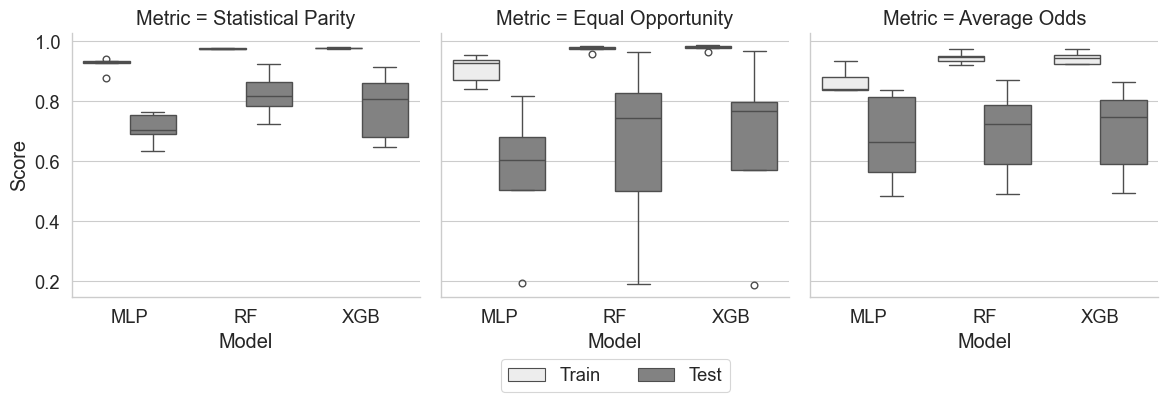

In [18]:
ap = get_full_metrics(sp_mlp_train_ap, sp_rf_train_ap, sp_xgb_train_ap, sp_mlp_test_ap, sp_rf_test_ap, sp_xgb_test_ap, eo_mlp_train_ap, eo_rf_train_ap, eo_xgb_train_ap, eo_mlp_test_ap, eo_rf_test_ap, eo_xgb_test_ap, ao_mlp_train_ap, ao_rf_train_ap, ao_xgb_train_ap, ao_mlp_test_ap, ao_rf_test_ap, ao_xgb_test_ap)
g = sns.FacetGrid(ap, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
# g.fig.suptitle('AUC Score')
g.fig.subplots_adjust(top=0.85)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.savefig("figs/ap.png", dpi=300)
g.savefig("figs/ap.pdf", bbox_inches="tight")
plt.show()

### Precision

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


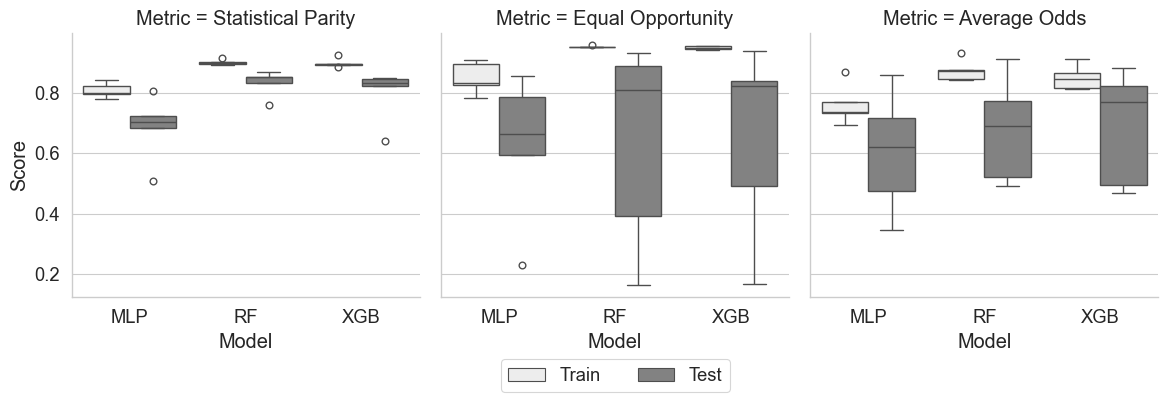

In [19]:
prec = get_full_metrics(sp_mlp_train_prec, sp_rf_train_prec, sp_xgb_train_prec, sp_mlp_test_prec, sp_rf_test_prec, sp_xgb_test_prec, eo_mlp_train_prec, eo_rf_train_prec, eo_xgb_train_prec, eo_mlp_test_prec, eo_rf_test_prec, eo_xgb_test_prec, ao_mlp_train_prec, ao_rf_train_prec, ao_xgb_train_prec, ao_mlp_test_prec, ao_rf_test_prec, ao_xgb_test_prec)
g = sns.FacetGrid(prec, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("F1 Score")
g.fig.savefig("figs/prec.png", dpi=300)
g.figure.savefig("figs/prec.pdf", bbox_inches="tight")
plt.show()

### Recall

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


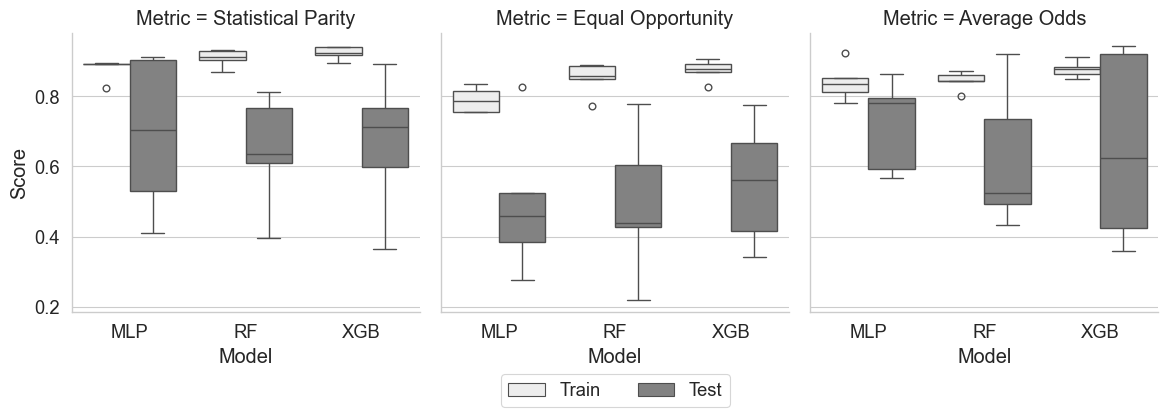

In [20]:
rec = get_full_metrics(sp_mlp_train_rec, sp_rf_train_rec, sp_xgb_train_rec, sp_mlp_test_rec, sp_rf_test_rec, sp_xgb_test_rec, eo_mlp_train_rec, eo_rf_train_rec, eo_xgb_train_rec, eo_mlp_test_rec, eo_rf_test_rec, eo_xgb_test_rec, ao_mlp_train_rec, ao_rf_train_rec, ao_xgb_train_rec, ao_mlp_test_rec, ao_rf_test_rec, ao_xgb_test_rec)
g = sns.FacetGrid(rec, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("Recall")
g.fig.savefig("figs/rec.png", dpi=300)
g.figure.savefig("figs/rec.pdf", bbox_inches="tight")
plt.show()

### F1 Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


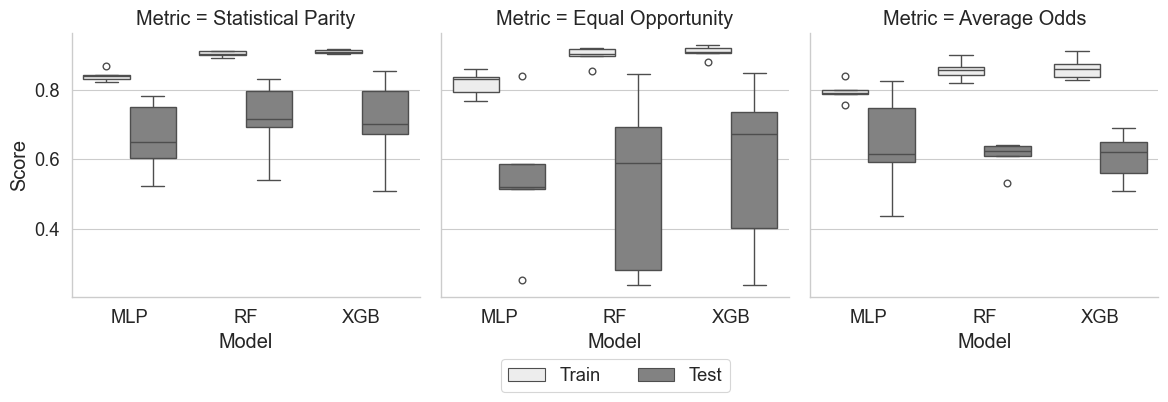

In [21]:
f1 = get_full_metrics(sp_mlp_train_f1, sp_rf_train_f1, sp_xgb_train_f1, sp_mlp_test_f1, sp_rf_test_f1, sp_xgb_test_f1, eo_mlp_train_f1, eo_rf_train_f1, eo_xgb_train_f1, eo_mlp_test_f1, eo_rf_test_f1, eo_xgb_test_f1, ao_mlp_train_f1, ao_rf_train_f1, ao_xgb_train_f1, ao_mlp_test_f1, ao_rf_test_f1, ao_xgb_test_f1)
g = sns.FacetGrid(f1, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("F1 Score")
g.fig.savefig("figs/f1.png", dpi=300)
g.figure.savefig("figs/f1.pdf", bbox_inches="tight")
plt.show()

### Accuracy Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


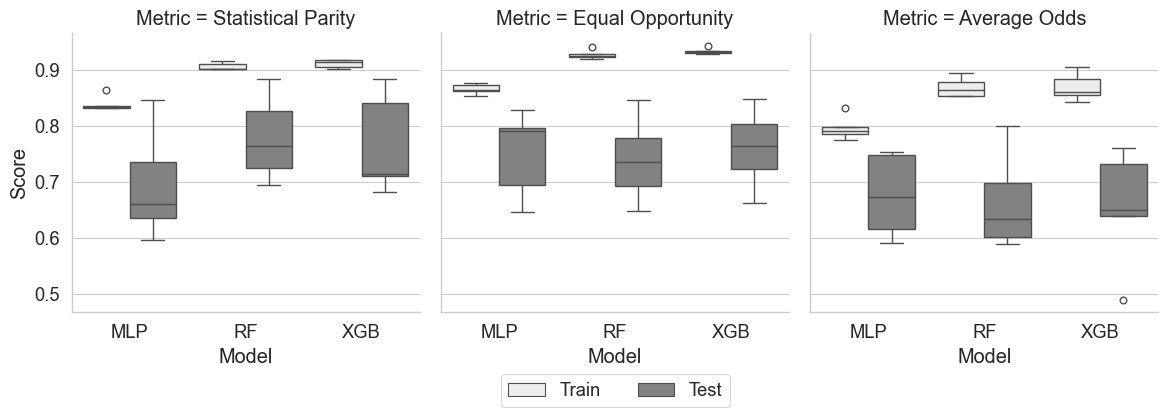

In [22]:
acc = get_full_metrics(sp_mlp_train_acc, sp_rf_train_acc, sp_xgb_train_acc, sp_mlp_test_acc, sp_rf_test_acc, sp_xgb_test_acc, eo_mlp_train_acc, eo_rf_train_acc, eo_xgb_train_acc, eo_mlp_test_acc, eo_rf_test_acc, eo_xgb_test_acc, ao_mlp_train_acc, ao_rf_train_acc, ao_xgb_train_acc, ao_mlp_test_acc, ao_rf_test_acc, ao_xgb_test_acc)
g = sns.FacetGrid(acc, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("Accuracy Score")
g.savefig("figs/acc.png", dpi=300)
g.savefig("figs/acc.pdf", bbox_inches="tight")
plt.show()